In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
df['Date'].head(7)


0    6/29/2010
1    6/30/2010
2     7/1/2010
3     7/2/2010
4     7/6/2010
5     7/7/2010
6     7/8/2010
Name: Date, dtype: object

In [6]:
df[['Date']] = df[['Date']].apply(pd.to_datetime)
df['Date'] = df['Date'].dt.strftime('%Y')
df['Date'] = df['Date'].astype(np.int64)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


<Axes: xlabel='Volume', ylabel='Adj Close'>

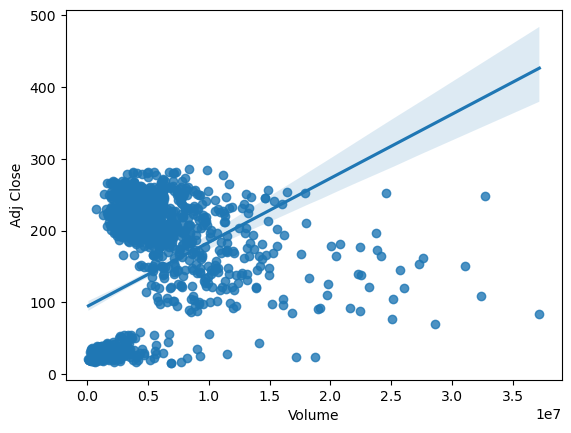

In [7]:
sns.regplot(data = df , x= 'Volume' , y= 'Adj Close')


In [8]:
#checking the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    1692
dtype: int64

In [10]:
#splitting of data into X and Y
x = df.drop(columns=['Adj Close'])

In [11]:
x.head(3)

,Date,Open,High,Low,Close,Volume
0,2010,19.000000,25.00,17.540001,23.889999,18766300
1,2010,25.790001,30.42,23.299999,23.830000,17187100
2,2010,25.000000,25.92,20.270000,21.959999,8218800


In [12]:
y = df['Adj Close']
y.head(3)

0    23.889999
1    23.830000
2    21.959999
Name: Adj Close, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
std_scaler = StandardScaler()
column = list(df.columns)
column.remove('Adj Close')
x=pd.DataFrame(std_scaler.fit_transform(x) , columns=column)

In [15]:
x.head()

,Date,Open,High,Low,Close,Volume
0,-1.692373,-1.203215,-1.147419,-1.211450,-1.151173,3.375219
1,-1.692373,-1.131197,-1.090764,-1.149400,-1.151809,3.007510
2,-1.692373,-1.139576,-1.137802,-1.182041,-1.171642,0.919286
3,-1.692373,-1.160789,-1.167280,-1.198846,-1.200915,0.202356
4,-1.692373,-1.192608,-1.199684,-1.229871,-1.233688,0.604503


### Splitting of the data into training and testing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [18]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((1184, 6), (1184,), (508, 6), (508,))

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

In [21]:
y_pred = lin_reg.predict(x_test)

In [22]:
score=r2_score(y_test, y_pred)
mse_lin_reg = mean_squared_error(y_test, y_pred)
mae_lin_reg = mean_absolute_error(y_test, y_pred)
rsme_lin_reg = np.sqrt(mse_lin_reg)

In [23]:
#fittinf of data into support vector regression
svr=SVR(kernel='rbf')
svr.fit(x_train, y_train)
        

SVR()

In [24]:
y_pred_svr = svr.predict(x_test)
score_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rsme_svr = np.sqrt(mse_svr)

## fitting of data into random forest

In [25]:
rand_reg = RandomForestRegressor(n_estimators=500, random_state=30)
rand_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=30)

In [26]:
y_pred_rand = rand_reg.predict(x_test)

In [27]:
score_rand = r2_score(y_test, y_pred_rand) 
mse_rand = mean_squared_error(y_test, y_pred_rand)
mae_rand = mean_absolute_error(y_test, y_pred_rand)
rsme_rand = np.sqrt(mse_rand)

In [28]:
model_result = {
    'Original result': y_test, 
    'SVR': y_pred_svr, 
    'LIN.reg': y_pred, 
    'Rand.Fore.Reg': y_pred_rand
}
model_result= pd.DataFrame(model_result)

In [29]:
model_result.head()

,Original result,SVR,LIN.reg,Rand.Fore.Reg
1102,249.100006,240.764417,249.100006,249.121960
1240,248.990005,236.115516,248.990005,248.953599
659,38.419998,43.887884,38.419998,38.354280
424,33.770000,32.730888,33.770000,33.782140
573,29.400000,30.274239,29.400000,29.403220


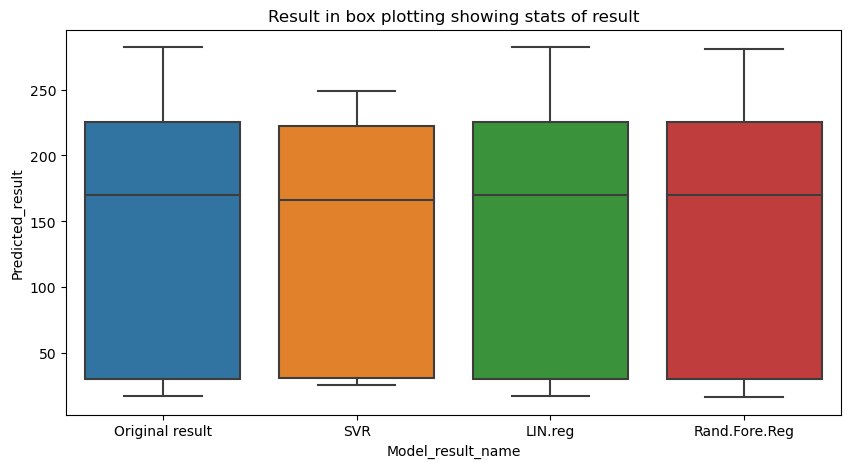

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=model_result)
plt.xlabel('Model_result_name')
plt.ylabel('Predicted_result')
plt.title('Result in box plotting showing stats of result')
plt.show()